# Pandas basics

<sub>The examples in this page is from the official Pandas documentation. For more details, please check out the Pandas documentation page: [Link](https://pandas.pydata.org/docs/user_guide/index.html).</sub>

---

# Creation

## Series and Dataframe

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Series is a 1-dimensional dataframe.

s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [3]:
# Pandas' unique way of handling the date

dates = pd.date_range("20130101", periods=6)  # Pandas has multiple ways of using date_range. Check out the documentation.
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [4]:
# index and columns names are optional, but you can define them

df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))
df

,A,B,C,D
2013-01-01,0.075437,-2.138378,0.220500,-2.622102
2013-01-02,-0.123794,-0.014208,1.028106,0.571388
2013-01-03,1.323161,-2.625521,0.385828,-1.700893
2013-01-04,-0.533021,-2.261734,-0.144942,1.625915
2013-01-05,-0.268247,0.066943,0.129547,1.406832
2013-01-06,0.633518,-1.297509,-1.086282,2.369941


In [5]:
# Making a dataframe from a dictionary
# Note: The most common way of generating a dataframe is to read in '.csv' file. But it is 
#       good to know the basics

df2 = pd.DataFrame(
    {
        "A": 1.0,
        "B": pd.Timestamp("20130102"),
        "C": pd.Series(1, index=list(range(4)), dtype="float32"),
        "D": np.array([3] * 4, dtype="int32"),
        "E": pd.Categorical(["test", "train", "test", "train"]),
        "F": "foo",
    }
)

df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [6]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [7]:
#df2.<TAB> to see the list of all attributes

In [49]:
# Adding a new column

df2 = df.copy()
df2["E"] = ["one", "one", "two", "three", "four", "three"]
df2

,A,B,C,D,E
2013-01-01,-0.961137,-1.190816,0.755875,-0.319302,one
2013-01-02,-0.702419,0.486172,-0.880247,1.420582,one
2013-01-03,1.106880,-0.236240,0.636290,1.761212,two
2013-01-04,-0.049483,-1.299836,0.070177,-1.729362,three
2013-01-05,-0.328242,-0.426409,0.202379,0.149186,four
2013-01-06,1.536557,-1.192452,-0.531820,0.852880,three


In [52]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range("20130102", periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [54]:
# Adding a new column with a Series
# But note that the "index" was used to match the rows. So, the data for the 20130101 is
# missing. Also, 20130107 is not added.

df["F"] = s1
df

,A,B,C,D,F
2013-01-01,-0.961137,-1.190816,0.755875,-0.319302,NaN
2013-01-02,-0.702419,0.486172,-0.880247,1.420582,1.0
2013-01-03,1.106880,-0.236240,0.636290,1.761212,2.0
2013-01-04,-0.049483,-1.299836,0.070177,-1.729362,3.0
2013-01-05,-0.328242,-0.426409,0.202379,0.149186,4.0
2013-01-06,1.536557,-1.192452,-0.531820,0.852880,5.0


# Viewing

In [8]:
df.head()

,A,B,C,D
2013-01-01,0.075437,-2.138378,0.220500,-2.622102
2013-01-02,-0.123794,-0.014208,1.028106,0.571388
2013-01-03,1.323161,-2.625521,0.385828,-1.700893
2013-01-04,-0.533021,-2.261734,-0.144942,1.625915
2013-01-05,-0.268247,0.066943,0.129547,1.406832


In [9]:
df.tail(3)

,A,B,C,D
2013-01-04,-0.533021,-2.261734,-0.144942,1.625915
2013-01-05,-0.268247,0.066943,0.129547,1.406832
2013-01-06,0.633518,-1.297509,-1.086282,2.369941


In [10]:
len(df)

6

In [11]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [12]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [14]:
# A very useful function

df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.184509,-1.378401,0.088793,0.275180
std,0.681897,1.172155,0.696417,1.993991
min,-0.533021,-2.625521,-1.086282,-2.622102
25%,-0.232133,-2.230895,-0.076320,-1.132823
50%,-0.024178,-1.717944,0.175024,0.989110
75%,0.493998,-0.335033,0.344496,1.571144
max,1.323161,0.066943,1.028106,2.369941


In [50]:
# 'isin' function checkes if the element is found in the provided keys
#  *****  A very useful function *****

df2["E"].isin(["two", "four"])

,A,B,C,D,E
2013-01-03,1.106880,-0.236240,0.636290,1.761212,two
2013-01-05,-0.328242,-0.426409,0.202379,0.149186,four


In [13]:
# Converting a dataframe to a Numpy array

df.to_numpy()

array([[ 0.07543729, -2.13837842,  0.22050016, -2.62210237],
       [-0.12379356, -0.01420797,  1.02810579,  0.57138835],
       [ 1.32316072, -2.62552115,  0.38582844, -1.70089344],
       [-0.53302109, -2.26173413, -0.14494184,  1.62591536],
       [-0.26824658,  0.06694323,  0.12954709,  1.40683173],
       [ 0.63351783, -1.29750875, -1.0862822 ,  2.36994108]])

In [15]:
# Transpose

df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,0.075437,-0.123794,1.323161,-0.533021,-0.268247,0.633518
B,-2.138378,-0.014208,-2.625521,-2.261734,0.066943,-1.297509
C,0.220500,1.028106,0.385828,-0.144942,0.129547,-1.086282
D,-2.622102,0.571388,-1.700893,1.625915,1.406832,2.369941


In [16]:
# Sorting the dataframe is a common function.
# Four of them are listed below.

df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,-2.622102,0.220500,-2.138378,0.075437
2013-01-02,0.571388,1.028106,-0.014208,-0.123794
2013-01-03,-1.700893,0.385828,-2.625521,1.323161
2013-01-04,1.625915,-0.144942,-2.261734,-0.533021
2013-01-05,1.406832,0.129547,0.066943,-0.268247
2013-01-06,2.369941,-1.086282,-1.297509,0.633518


In [17]:
df.sort_index(axis=0, ascending=False)

,A,B,C,D
2013-01-06,0.633518,-1.297509,-1.086282,2.369941
2013-01-05,-0.268247,0.066943,0.129547,1.406832
2013-01-04,-0.533021,-2.261734,-0.144942,1.625915
2013-01-03,1.323161,-2.625521,0.385828,-1.700893
2013-01-02,-0.123794,-0.014208,1.028106,0.571388
2013-01-01,0.075437,-2.138378,0.220500,-2.622102


In [18]:
df.sort_values(by="B")

,A,B,C,D
2013-01-03,1.323161,-2.625521,0.385828,-1.700893
2013-01-04,-0.533021,-2.261734,-0.144942,1.625915
2013-01-01,0.075437,-2.138378,0.220500,-2.622102
2013-01-06,0.633518,-1.297509,-1.086282,2.369941
2013-01-02,-0.123794,-0.014208,1.028106,0.571388
2013-01-05,-0.268247,0.066943,0.129547,1.406832


In [19]:
df.sort_values(axis=1,by="2013-01-02")

,A,B,D,C
2013-01-01,0.075437,-2.138378,-2.622102,0.220500
2013-01-02,-0.123794,-0.014208,0.571388,1.028106
2013-01-03,1.323161,-2.625521,-1.700893,0.385828
2013-01-04,-0.533021,-2.261734,1.625915,-0.144942
2013-01-05,-0.268247,0.066943,1.406832,0.129547
2013-01-06,0.633518,-1.297509,2.369941,-1.086282


# Selection

The standard Numpy method works fine. But Pandas has its own indexing methods. These are often more efficient than Numpy methods because these are optimized for Pandas

- `.loc`:    selection by label. ***The indexing is INCLUSIVE***
- `.at`:     fast access to a scalar by label
- `.iloc`:   selection by numeric index
- `.iat`:    fast access to a scalar by numeric index


## Accessing

In [20]:
# Numpy method: Not highly recommended
df[0:3]

,A,B,C,D
2013-01-01,0.075437,-2.138378,0.220500,-2.622102
2013-01-02,-0.123794,-0.014208,1.028106,0.571388
2013-01-03,1.323161,-2.625521,0.385828,-1.700893


In [21]:
# Pandas way to select a column

df["A"]

2013-01-01    0.075437
2013-01-02   -0.123794
2013-01-03    1.323161
2013-01-04   -0.533021
2013-01-05   -0.268247
2013-01-06    0.633518
Freq: D, Name: A, dtype: float64

In [23]:
df.B

2013-01-01    0.220500
2013-01-02    1.028106
2013-01-03    0.385828
2013-01-04   -0.144942
2013-01-05    0.129547
2013-01-06   -1.086282
Freq: D, Name: C, dtype: float64

In [24]:
df.C.values

array([-2.13837842, -0.01420797, -2.62552115, -2.26173413,  0.06694323,
       -1.29750875])

In [25]:
df.D.values[:1]

array([-2.62210237])

## Selection by label

In [32]:
df.loc["20130101"]

A   -0.961137
B   -1.190816
C    0.755875
D   -0.319302
Name: 2013-01-01 00:00:00, dtype: float64

In [33]:
# Selecting multiple columns

df.loc[:,["A","B"]]

,A,B
2013-01-01,-0.961137,-1.190816
2013-01-02,-0.702419,0.486172
2013-01-03,1.106880,-0.236240
2013-01-04,-0.049483,-1.299836
2013-01-05,-0.328242,-0.426409
2013-01-06,1.536557,-1.192452


In [34]:
df.loc["20130102":"20130104", ["A", "B"]]  # "20130104" is included.

,A,B
2013-01-02,-0.702419,0.486172
2013-01-03,1.106880,-0.236240
2013-01-04,-0.049483,-1.299836


In [35]:
df.loc["20130102", ["A", "B"]]

A   -0.702419
B    0.486172
Name: 2013-01-02 00:00:00, dtype: float64

In [36]:
df.loc[dates[0], "A"]

-0.9611372996625194

In [37]:
# Fast access to a single value

df.at[dates[0], "A"]

-0.9611372996625194

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@<br>
***You should be Extremely CAREFUL in the following example!!!***

In [126]:
# Note taht 20130104 IS inlcuded !!!!!!!!!!!!!!!!!
# If the index is not a number, it seems to use .loc[], which uses inclusive indexing.
df["20130102":"20130104"]

,A,B,C,D
2013-01-02,0.154364,0.591045,-0.830060,5
2013-01-03,-1.272496,-1.428505,-2.175798,5
2013-01-04,1.048842,-0.000638,0.307655,5


## Selection by position (i.e., using numbers)

In [38]:
df.iloc[3]

A   -0.049483
B   -1.299836
C    0.070177
D   -1.729362
Name: 2013-01-04 00:00:00, dtype: float64

In [39]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,-0.049483,-1.299836
2013-01-05,-0.328242,-0.426409


In [40]:
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2013-01-02,-0.702419,-0.880247
2013-01-03,1.106880,0.636290
2013-01-05,-0.328242,0.202379


In [41]:
df.iloc[1:3, :]

,A,B,C,D
2013-01-02,-0.702419,0.486172,-0.880247,1.420582
2013-01-03,1.106880,-0.236240,0.636290,1.761212


In [42]:
df.iloc[:, 1:3]

,B,C
2013-01-01,-1.190816,0.755875
2013-01-02,0.486172,-0.880247
2013-01-03,-0.236240,0.636290
2013-01-04,-1.299836,0.070177
2013-01-05,-0.426409,0.202379
2013-01-06,-1.192452,-0.531820


In [43]:
df.iloc[1, 1]

0.4861723707890824

In [44]:
# Fast access to a single value

df.iat[1, 1]

0.4861723707890824

## Boolean indexing

In [29]:
df[df["A"] > 0]

,A,B,C,D
2013-01-01,0.075437,-2.138378,0.220500,-2.622102
2013-01-03,1.323161,-2.625521,0.385828,-1.700893
2013-01-06,0.633518,-1.297509,-1.086282,2.369941


In [49]:
df[df["A"]>0]=0
df

,A,B,C,D
2013-01-01,0.000000,0.000000,0.000000,0.000000
2013-01-02,-0.123794,-0.014208,1.028106,0.571388
2013-01-03,0.000000,0.000000,0.000000,0.000000
2013-01-04,-0.533021,-2.261734,-0.144942,1.625915
2013-01-05,-0.268247,0.066943,0.129547,1.406832
2013-01-06,0.000000,0.000000,0.000000,0.000000


In [46]:
df[df > 0]

,A,B,C,D
2013-01-01,NaN,NaN,0.755875,NaN
2013-01-02,NaN,0.486172,NaN,1.420582
2013-01-03,1.106880,NaN,0.636290,1.761212
2013-01-04,NaN,NaN,0.070177,NaN
2013-01-05,NaN,NaN,0.202379,0.149186
2013-01-06,1.536557,NaN,NaN,0.852880


In [111]:
# Combining multiple selection methods: ***** A very useful technique *****

df.loc[  df["A"]>0, ["B","D"]  ]   

,B,D
2013-01-02,0.591045,0.774933
2013-01-04,-0.000638,-0.854475
2013-01-05,-0.081578,-0.693238
2013-01-06,-0.596582,-1.073306


In [50]:
tmp = df[ (df["A"] < 0) & (df["C"]<0)   ]   # This makes a copy of a slice.
tmp

,A,B,C,D
2013-01-04,-0.533021,-2.261734,-0.144942,1.625915


In [55]:
tmp.iloc[0,0]=0    # This generates a warning. Modifying an element of a copy can be confusing.
tmp

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,A,B,C,D
2013-01-04,0.0,0.0,0.0,0.0


In [56]:
df   # When you check the 2013-01-04, the data has not been modified.

,A,B,C,D
2013-01-01,0.000000,0.000000,0.000000,0.000000
2013-01-02,-0.123794,-0.014208,1.028106,0.571388
2013-01-03,0.000000,0.000000,0.000000,0.000000
2013-01-04,-0.533021,-2.261734,-0.144942,1.625915
2013-01-05,-0.268247,0.066943,0.129547,1.406832
2013-01-06,0.000000,0.000000,0.000000,0.000000


In [65]:
# Use .copy() to make a real copy

df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))
tmp = df[ (df["A"] < 0) & (df["C"]<0)   ].copy()   # Using .copy() explicitly
tmp

,A,B,C,D
2013-01-02,-0.294030,-0.262320,-0.181241,-0.327643
2013-01-03,-1.447575,0.315996,-1.276388,0.906816


In [66]:
tmp.iloc[0,0]=0   # Now, there is no confusin, and no warning message
tmp

,A,B,C,D
2013-01-02,0.000000,-0.262320,-0.181241,-0.327643
2013-01-03,-1.447575,0.315996,-1.276388,0.906816


## Setting

In [57]:
df.at[dates[0], "A"] = 0
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.755875,-0.319302,NaN
2013-01-02,-0.702419,0.486172,-0.880247,1.420582,1.0
2013-01-03,1.106880,-0.236240,0.636290,1.761212,2.0
2013-01-04,-0.049483,-1.299836,0.070177,-1.729362,3.0
2013-01-05,-0.328242,-0.426409,0.202379,0.149186,4.0
2013-01-06,1.536557,-1.192452,-0.531820,0.852880,5.0


In [58]:
df.iat[0, 1] = 0
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.755875,-0.319302,NaN
2013-01-02,-0.702419,0.486172,-0.880247,1.420582,1.0
2013-01-03,1.106880,-0.236240,0.636290,1.761212,2.0
2013-01-04,-0.049483,-1.299836,0.070177,-1.729362,3.0
2013-01-05,-0.328242,-0.426409,0.202379,0.149186,4.0
2013-01-06,1.536557,-1.192452,-0.531820,0.852880,5.0


In [113]:
df.loc[:, "D"] = np.array([5] * len(df))
df

,A,B,C,D
2013-01-01,-1.267447,-1.159586,-0.222321,5
2013-01-02,0.154364,0.591045,-0.830060,5
2013-01-03,-1.272496,-1.428505,-2.175798,5
2013-01-04,1.048842,-0.000638,0.307655,5
2013-01-05,1.319325,-0.081578,1.047175,5
2013-01-06,0.476471,-0.596582,0.323578,5


---

`where` operation in pandas:  This is a special operation.  Use with care.

In [117]:
df2 = df.copy()
df2[df2 > 0] = -df2
df2

,A,B,C,D
2013-01-01,-1.267447,-1.159586,-0.222321,-5
2013-01-02,-0.154364,-0.591045,-0.830060,-5
2013-01-03,-1.272496,-1.428505,-2.175798,-5
2013-01-04,-1.048842,-0.000638,-0.307655,-5
2013-01-05,-1.319325,-0.081578,-1.047175,-5
2013-01-06,-0.476471,-0.596582,-0.323578,-5


---

## Missing data

Dealing with missing data is one of the most powerful feature of Pandas

In [118]:
dates = pd.date_range("20130101", periods=6)

df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ["E"])
df1

,A,B,C,D,E
2013-01-01,-1.267447,-1.159586,-0.222321,5,NaN
2013-01-02,0.154364,0.591045,-0.830060,5,NaN
2013-01-03,-1.272496,-1.428505,-2.175798,5,NaN
2013-01-04,1.048842,-0.000638,0.307655,5,NaN


In [120]:
df1.loc[dates[0] : dates[1], "E"] = 1    # dates[1] is included because we used .loc[]
df1

,A,B,C,D,E
2013-01-01,-1.267447,-1.159586,-0.222321,5,1.0
2013-01-02,0.154364,0.591045,-0.830060,5,1.0
2013-01-03,-1.272496,-1.428505,-2.175798,5,NaN
2013-01-04,1.048842,-0.000638,0.307655,5,NaN


In [64]:
# "dropna" removes records with missing values

df1.dropna(how="any")

,A,B,C,D,F,E
2013-01-02,-0.702419,0.486172,-0.880247,5,1.0,1.0


In [128]:
# Checks missing values

pd.isna(df1)

,A,B,C,D,E
2013-01-01,False,False,False,False,False
2013-01-02,False,False,False,False,False
2013-01-03,False,False,False,False,True
2013-01-04,False,False,False,False,True


In [65]:
# "fillna" fills missing values

df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.755875,5,5.0,1.0
2013-01-02,-0.702419,0.486172,-0.880247,5,1.0,1.0
2013-01-03,1.106880,-0.236240,0.636290,5,2.0,5.0
2013-01-04,-0.049483,-1.299836,0.070177,5,3.0,5.0


In [129]:
df1[  pd.isna(df1)  ] = 1000
df1

,A,B,C,D,E
2013-01-01,-1.267447,-1.159586,-0.222321,5,1.0
2013-01-02,0.154364,0.591045,-0.830060,5,1.0
2013-01-03,-1.272496,-1.428505,-2.175798,5,1000.0
2013-01-04,1.048842,-0.000638,0.307655,5,1000.0


# Merge

## Concat

In [73]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,-0.364332,0.175779,-0.268597,0.738309
1,1.462308,-0.553682,-0.192788,-0.025861
2,-0.000615,-0.662440,-0.219301,0.369197
3,0.195289,-0.275842,1.655787,0.077807
4,-0.980550,0.842094,1.369565,1.413372
5,-0.482246,2.250875,-0.998195,1.698116
6,1.649390,-0.271423,-0.231141,1.751194
7,1.686380,-0.060072,-0.430952,1.151261
8,-0.400849,-0.600117,0.182467,0.614736
9,-0.287174,-1.128477,2.782153,-0.394542


In [74]:
a, b, c = df[:3], df[3:7], df[7:]
a

,0,1,2,3
0,-0.364332,0.175779,-0.268597,0.738309
1,1.462308,-0.553682,-0.192788,-0.025861
2,-0.000615,-0.662440,-0.219301,0.369197


In [75]:
b

,0,1,2,3
3,0.195289,-0.275842,1.655787,0.077807
4,-0.980550,0.842094,1.369565,1.413372
5,-0.482246,2.250875,-0.998195,1.698116
6,1.649390,-0.271423,-0.231141,1.751194


In [76]:
c

,0,1,2,3
7,1.686380,-0.060072,-0.430952,1.151261
8,-0.400849,-0.600117,0.182467,0.614736
9,-0.287174,-1.128477,2.782153,-0.394542


In [77]:
pd.concat([a,b,c])

,0,1,2,3
0,-0.364332,0.175779,-0.268597,0.738309
1,1.462308,-0.553682,-0.192788,-0.025861
2,-0.000615,-0.662440,-0.219301,0.369197
3,0.195289,-0.275842,1.655787,0.077807
4,-0.980550,0.842094,1.369565,1.413372
5,-0.482246,2.250875,-0.998195,1.698116
6,1.649390,-0.271423,-0.231141,1.751194
7,1.686380,-0.060072,-0.430952,1.151261
8,-0.400849,-0.600117,0.182467,0.614736
9,-0.287174,-1.128477,2.782153,-0.394542


## Join

In [80]:
left = pd.DataFrame({"key": ["foo", "bar"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "bar"], "rval": [4, 5]})

In [81]:
left

,key,lval
0,foo,1
1,bar,2


In [82]:
right

,key,rval
0,foo,4
1,bar,5


In [83]:
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,bar,2,5


In [84]:
left = pd.DataFrame({"key": ["foo", "foo"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "foo"], "rval": [4, 5]})

In [85]:
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


## Grouping

In [87]:
df = pd.DataFrame(
        {
            "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
            "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
            "C": np.random.randn(8),
            "D": np.random.randn(8),
        }
    )

df

,A,B,C,D
0,foo,one,-0.237850,-0.738997
1,bar,one,0.871475,-0.321633
2,foo,two,3.182561,-0.829477
3,bar,three,0.702153,1.464928
4,foo,two,0.042660,0.418595
5,bar,two,0.756583,-1.446500
6,foo,one,-0.977365,0.649920
7,foo,three,-1.334903,-0.192026


In [90]:
df.groupby("A").sum()


,C,D
A,,
bar,2.330212,-0.303206
foo,0.675104,-0.691985


In [91]:
df.groupby(["A","B"]).sum()

C         D
A   B                        
bar one    0.871475 -0.321633
    three  0.702153  1.464928
    two    0.756583 -1.446500
foo one   -1.215214 -0.089077
    three -1.334903 -0.192026
    two    3.225221 -0.410882

# Plotting

In [94]:
df = pd.DataFrame(
    np.random.randn(1000, 4), 
    index=pd.date_range("1/1/2000", periods=1000), 
    columns=["A", "B", "C", "D"]
)

df

,A,B,C,D
2000-01-01,-2.078293,1.253725,-0.658636,1.347334
2000-01-02,1.622887,0.028468,0.661046,-0.332496
2000-01-03,-0.371265,0.892670,-1.542119,-0.015567
2000-01-04,0.279512,-1.953485,0.845440,-0.736071
2000-01-05,0.676653,0.041708,0.546132,-0.450578
...,...,...,...,...
2002-09-22,1.824220,0.072931,1.448960,0.107820
2002-09-23,2.997527,-0.398754,1.276457,1.062006
2002-09-24,0.298854,-1.164245,-0.178326,-0.454086
2002-09-25,-0.516585,-1.316537,0.066166,-0.224015


In [95]:
df2 = df.cumsum()
df2

,A,B,C,D
2000-01-01,-2.078293,1.253725,-0.658636,1.347334
2000-01-02,-0.455406,1.282193,0.002410,1.014838
2000-01-03,-0.826671,2.174863,-1.539709,0.999271
2000-01-04,-0.547159,0.221379,-0.694269,0.263200
2000-01-05,0.129494,0.263087,-0.148136,-0.187378
...,...,...,...,...
2002-09-22,-18.333681,9.955872,40.498259,-58.380485
2002-09-23,-15.336154,9.557118,41.774716,-57.318479
2002-09-24,-15.037300,8.392873,41.596390,-57.772565
2002-09-25,-15.553885,7.076336,41.662555,-57.996580


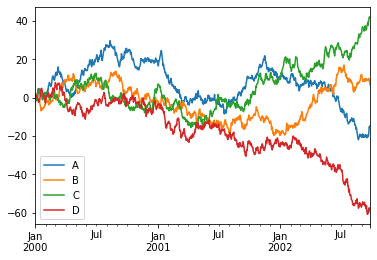

In [97]:
df2.plot()

# File I/O

To read and write a big data file, Pandas is often the best option available.
`.csv` file format is a common data file format. Pandas provide read/write functions for other formats including MS Excel files and HDF5 files.

In [100]:
df.to_csv("foo.csv")
df3 = pd.read_csv("foo.csv")
df3

,Unnamed: 0,A,B,C,D
0,2000-01-01,-2.078293,1.253725,-0.658636,1.347334
1,2000-01-02,1.622887,0.028468,0.661046,-0.332496
2,2000-01-03,-0.371265,0.892670,-1.542119,-0.015567
3,2000-01-04,0.279512,-1.953485,0.845440,-0.736071
4,2000-01-05,0.676653,0.041708,0.546132,-0.450578
...,...,...,...,...,...
995,2002-09-22,1.824220,0.072931,1.448960,0.107820
996,2002-09-23,2.997527,-0.398754,1.276457,1.062006
997,2002-09-24,0.298854,-1.164245,-0.178326,-0.454086
998,2002-09-25,-0.516585,-1.316537,0.066166,-0.224015
